In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

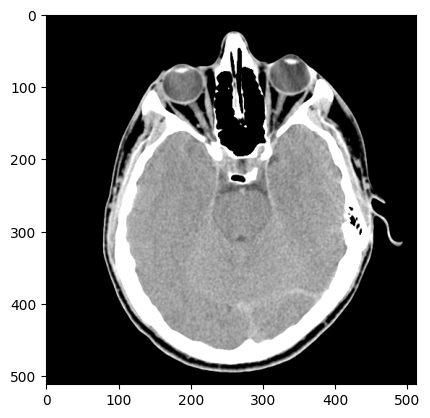

In [3]:
ct = cv2.imread("headCT.tif")
ct = cv2.cvtColor(ct, cv2.COLOR_BGR2GRAY)
plt.imshow(ct, cmap="gray")

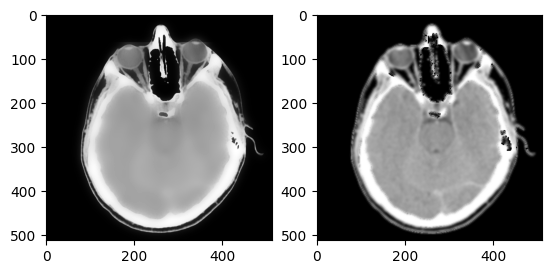

In [4]:
ct_denoise = cv2.bilateralFilter(ct, 200, 100., 10.)
ct_denoise_anisotrop = cv2.ximgproc.anisotropicDiffusion(cv2.cvtColor(ct, cv2.COLOR_GRAY2BGR), .25, 16, 4)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ct_denoise, cmap="gray")
ax2.imshow(ct_denoise_anisotrop, cmap="gray")

In [1]:
ct_tresh_skull, ct_tresh_skull_label = cv2.threshold(ct_denoise, 180, 255, cv2.THRESH_BINARY)
ct_tresh_brain_label = cv2.inRange(ct_denoise, 100, 180, cv2.THRESH_BINARY)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ct_tresh_skull_label, cmap="gray")
ax2.imshow(ct_tresh_brain_label, cmap="gray")

NameError: name 'cv2' is not defined

In [20]:
a, *_ = [0,1,2,3]

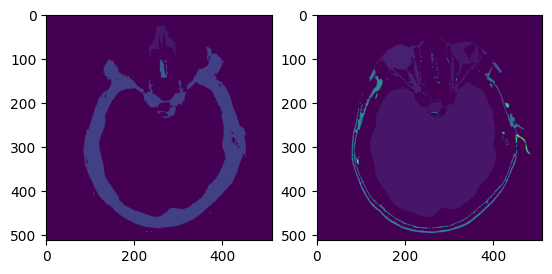

In [39]:
ct_cc_skull, ct_cc_skull_labels = cv2.connectedComponents(ct_tresh_skull_label)
ct_cc_brain, ct_cc_brain_labels = cv2.connectedComponents(ct_tresh_brain_label)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ct_cc_skull_labels)
ax2.imshow(ct_cc_brain_labels)

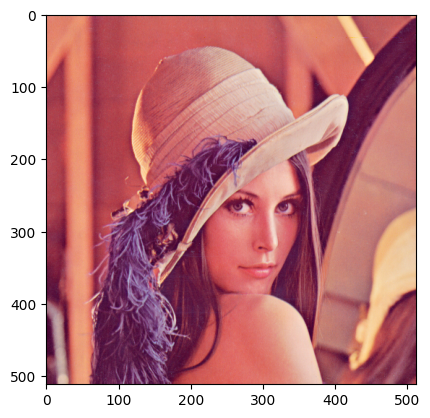

In [17]:
lenna = cv2.imread("./Lenna_(test_image).png")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)
plt.imshow(lenna)

In [16]:
import random

def add_noise(i):
    img = i.copy()
    row , col, _ = img.shape
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 255
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
    return img

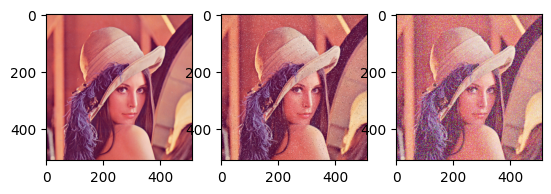

In [23]:
lenna_saltpepper = add_noise(lenna)
gauss = np.random.normal(0,1,lenna.size)
gauss = gauss.reshape(*lenna.shape).astype('uint8')
lenna_gauss = cv2.add(lenna, gauss)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(lenna)
ax2.imshow(lenna_saltpepper)
ax3.imshow(lenna_gauss)

In [24]:
def three_way_denoise(img):
    fastnlden = cv2.fastNlMeansDenoisingColored(img)
    bilateral = cv2.bilateralFilter(img, 200, 100., 10.)
    anisotropic = cv2.ximgproc.anisotropicDiffusion(img, .25, 16, 4)
    return (fastnlden, bilateral, anisotropic)

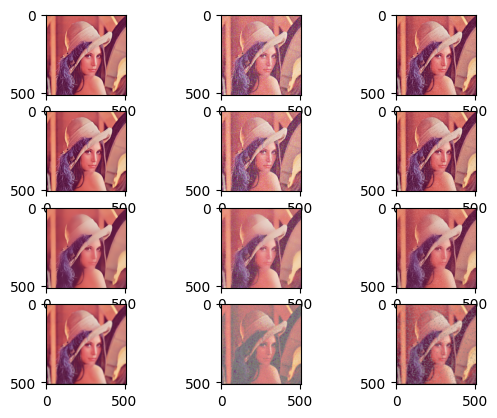

In [26]:
f, axs = plt.subplots(4, 3)
axs[0,0].imshow(lenna)
a10, a20, a30 = three_way_denoise(lenna)
axs[1,0].imshow(a10)
axs[2,0].imshow(a20)
axs[3,0].imshow(a30) 
axs[0,1].imshow(lenna_gauss)
a11, a21, a31 = three_way_denoise(lenna_gauss)
axs[1,1].imshow(a11)
axs[2,1].imshow(a21)
axs[3,1].imshow(a31)
axs[0,2].imshow(lenna_saltpepper)
a12, a22, a32 = three_way_denoise(lenna_saltpepper)
axs[1,2].imshow(a12)
axs[2,2].imshow(a22)
axs[3,2].imshow(a32) 
